In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0-rc2


In [0]:
from tensorflow.keras.layers import Input,Dense,SimpleRNN,LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


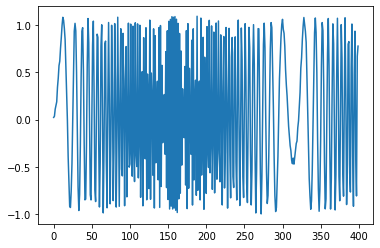

In [5]:
series = np.sin((0.1*np.arange(400))**2)+0.1*np.random.rand(400)
plt.plot(series)

In [6]:
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


In [0]:
##Auto Regressive Model
i = Input(shape=(T,1))
x = SimpleRNN(5,activation='relu')(i)
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1),
)

r = model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

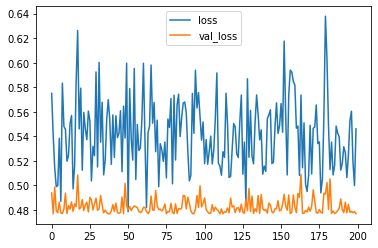

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

#As we can see AR failed miserably

In [0]:
#Wrong Prediction
validation_target = Y[-N//2:]
validation_prediction = []
i = -N//2
while len(validation_prediction)<len(validation_target):
  p = model.predict(X[i].reshape(1,-1))[0,0]
  i+=1
  validation_prediction.append(p)

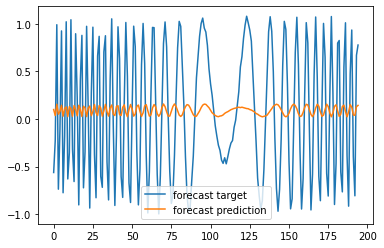

In [11]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_prediction, label='forecast prediction')
plt.legend()

In [0]:
#Real prediction
validation_target = Y[-N//2:]
validation_prediction = []
last_x = X[-N//2]
while len(validation_prediction)<len(validation_target):
  p = model.predict(last_x.reshape(1,-1))[0,0]
  validation_prediction.append(p)
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

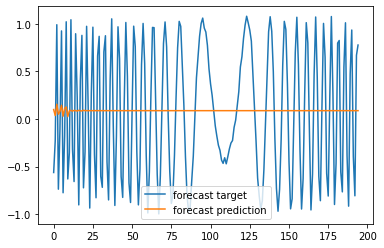

In [13]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_prediction, label='forecast prediction')
plt.legend()

In [14]:
#Since AR failed so miserably lets try SimpleRNN
#Since the shape has to be changed for RNN we have to create the dataset again
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10, 1) Y.shape (390,)


In [0]:
i = Input(shape=(T,1))
x = SimpleRNN(5,activation='relu')(i)
x = Dense(1)(i)
model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1),
)

r = model.fit(
    X[:-N//2],Y[:-N//2],
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

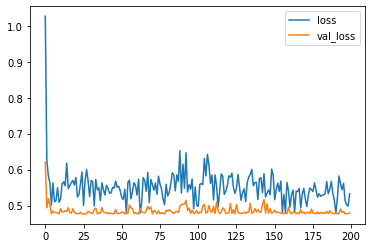

In [16]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
#Wrong way to predict
validation_target = Y[-N//2:]
validation_prediction = []
i = -N//2
while len(validation_prediction)<len(validation_target):
  p = model.predict(X[i].reshape(1,-1,1))[0,0]
  i+=1
  validation_prediction.append(p)

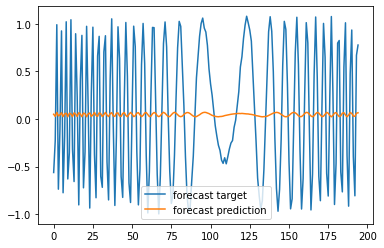

In [18]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_prediction, label='forecast prediction')
plt.legend()

In [0]:
validation_target = Y[-N//2:]
validation_prediction = []
last_x = X[-N//2]
while len(validation_prediction)<len(validation_target):
  p = model.predict(last_x.reshape(1,-1,1))[0,0]
  validation_prediction.append(p)
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

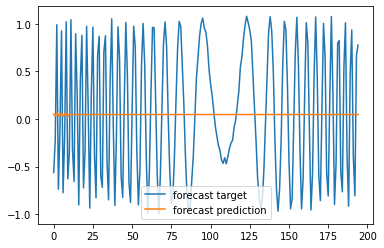

In [20]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_prediction, label='forecast prediction')
plt.legend()

In [22]:
#Even the simple RNN failed because it cant learn from inputs far back in the sequence, therefore let's use LSTM to overcome this problem
i = Input(shape=(T, 1))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.05),
)


r = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 0s 57ms/step - loss: 0.5839 - val_loss: 0.5321
Epoch 2/200
7/7 [==============================] - 0s 9ms/step - loss: 0.4765 - val_loss: 0.5403
Epoch 3/200
7/7 [==============================] - 0s 9ms/step - loss: 0.5326 - val_loss: 0.5773
Epoch 4/200
7/7 [==============================] - 0s 10ms/step - loss: 0.4028 - val_loss: 0.4946
Epoch 5/200
7/7 [==============================] - 0s 10ms/step - loss: 0.3489 - val_loss: 0.4709
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.2805 - val_loss: 0.3651
Epoch 7/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1726 - val_loss: 0.3992
Epoch 8/200
7/7 [==============================] - 0s 9ms/step - loss: 0.1647 - val_loss: 0.2150
Epoch 9/200
7/7 [==============================] - 0s 10ms/step - loss: 0.1104 - val_loss: 0.2108
Epoch 10/200
7/7 [==============================] - 0s 10ms/step - loss: 0.0717 - val_loss: 0.0866
Epoch 11/200
7/7 [====

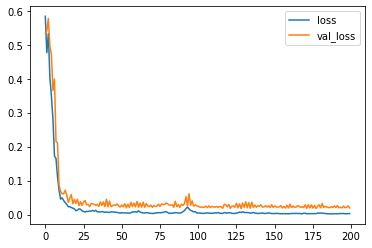

In [23]:

import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
validation_target = Y[-N//2:]
validation_prediction = []
i = -N//2
while len(validation_prediction)<len(validation_target):
  p = model.predict(X[i].reshape(1,-1,1))[0,0]
  i+=1
  validation_prediction.append(p)

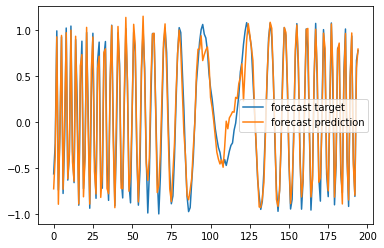

In [25]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_prediction, label='forecast prediction')
plt.legend()

In [0]:
validation_target = Y[-N//2:]
validation_prediction = []
last_x = X[-N//2]
while len(validation_prediction)<len(validation_target):
  p = model.predict(last_x.reshape(1,-1,1))[0,0]
  validation_prediction.append(p)
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

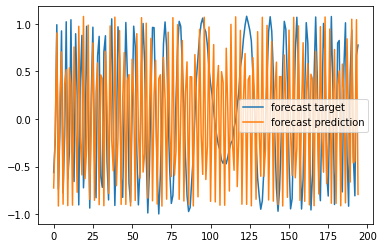

In [27]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_prediction, label='forecast prediction')
plt.legend()

In [0]:
#LSTMs work far more better than AR and SimpleRNNs